# Analysis for Continuous Improvement

Author Name: Karli Meckler

9-digit PID: 730231293

Continuous Improvement embraces a belief there is _always room to make things better_. It is a mindset and process we value and practice in this course. In this assignment, you are able to practice continuous improvement and contribute to the design ideas of the course.

## Brainstorming Ideas

Reflect on your personal experiences and observations in COMP110 and **brainstorm modifications to the course that _create value_ beyond its current design**. When brainstorming, try not to be critical of the ideas you come up with regarding scale, stakeholders impacted, or for any other reasons. In the markdown cell below, brainstorm 3 to 5 ideas you think would create value for you.

Each brainstormed idea should state a. the suggested change or addition, b. what the expected value created, and c. which specific stakeholders would benefit.  If helpful, expand on the following template "The course should (state idea here) because it will (state value created here) for (insert stakeholders here)."

Example A: "The course should use only examples from psychology experiments because it will be more relevant for students who are psychology majors."

Example B: "The course should not have post-lesson questions because they are not useful for most students in the class."

### Part 1. Creative Ideation

1. The course should offer opportunities in lesson to create and share personal examples in code because it will be useful for students, many of which have noted that this is a method they use to enhance understanding when uncertain of how a concept works.
2. The course should include more detailed instructions for exercises because it will reduce time spent in office hours by students, saving student and instructional staff time.
3. The coursework should include examples students might see in several potential career paths because it will improve student confidence in their preparedness for the workforce.
4. The coursework should should include examples students might see in the future (e.g. potential career paths, future courses) because students do not currently believe the skills they are learning in this course will be valuable to them in the future.
5. The course should limit the topics discussed (and maybe include optional extra learning opportunities) because it will assist students who feel that the pace of the course is moving too quickly.

## Connecting with Available Data

The data you have available for this analysis is limited to the anonymized course survey you and your peers filled out a few weeks ago. The data is found in the `survey.csv` file in this exercise directory. Each row represents an individual survey response. Each column has a description which can be found on the project write-up here: <https://22s.comp110.com/exercises/ex08.html>

Review the list of available data and identify which one of your ideas _does not_, or is _least likely to_, have relevant data to support the analysis of your idea to create value. In the box below, identify which of your ideas lacks data and suggest how we might be able to collect this data in the future. One aspect of _continuous improvement_ is trying to avoid "tunnel vision" where possible improvements are not considered because there is no data available to analyze it. Identifying new data sources can unlock improvements!

### Part 2. Identifying Missing Data

1. Idea without sufficient data to analyze: The coursework should include examples students might see in several potential career paths because it will improve student confidence in their preparedness for the workforce.

2. Suggestion for how to collect data to support this idea in the future: A semesterly post-course survey could provide data to answer these questions. Questions might include: How do you feel COMP110 has prepared you enter a position which requires the use of computer science (1-7 Scale)? Have you or are you planning to obtain a job or internship in computer science in the next 6 months (Yes or No)? How confident are you in your computer science skills (1-7 Scale)? How confident are you in your ability to learn computer science skills (1-7 Scale)? Essentially, we need metrics to quantify student confidence as it relates to the subject of computer science after taking this course.

## Choosing an Idea to Analyze

Consider those of your ideas which _do_ seem likely to have relevant data to analyze. If none of your ideas do, spend a few minutes and brainstorm another idea or two with the added connection of data available on hand and add those ideas to your brainstormed ideas list.

Select the one idea which you believe is _most valuable_ to analyze relative to the others and has data to support the analysis of. In the markdown cell for Part 3 below, identify the idea you are exploring and articulate why you believe it is most valuable (e.g. widest impact, biggest opportunity for improvement, simplest change for significant improvement, and so on).

### Part 3. Choosing Your Analysis

1. Idea to analyze with available data: The coursework should should include examples students might see in the future (e.g. potential career paths, future courses) because students do not currently believe the skills they are learning in this course will be valuable to them in the future.

2. This idea is more valuable than the others brainstormed because: The aim of any given course is for students to come out of it better prepared for their personal goals, whether that be the next class in which they will see this material, a hobby activity, or a career. Understanding the value of the material of a class to the students taking it can help assess if the aims of the course are being met and if the students feel that they are actively working towards their goals as they relate to the course. In response, courses might make adjustments to increase the value of the course in the eyes of the students. While the details might be sussed out later (i.e., the other ideas presented above), this question provides a broad, foundational understanding of the degree to which students feel the class is benefiting (or not benefitting) them. 


## Your Analysis

Before you begin analysis, a reminder that we do not expect the data to support everyone's ideas and you can complete this exercise for full credit even if the data does not clearly support your suggestion or even completely refutes it. What we are looking for is a logical attempt to explore the data using the techniques you have learned up until now in a way that _either_ supports, refutes, or does not have a clear result and then to reflect on your findings after the analysis.

Using the utility functions you created for the previous exercise, you will continue with your analysis in the following part. Before you begin, refer to the rubric on the technical expectations of this section in the exercise write-up.

In this section, you are expected to interleave code and markdown cells such that for each step of your analysis you are starting with an English description of what you are planning to do next in a markdown cell, followed by a Python cell that performs that step of the analysis.

### Part 4. Analysis

We begin by changing some settings in the notebook to automatically reload changes to imported files.

In [144]:
%reload_ext autoreload
%autoreload 2

We continue by importing the helper functions from `data_utils`. We also import other functions from packages that we will use during our analysis. 

In [145]:
from data_utils import read_csv_rows, column_values, columnar, head, select, concat, count, average
from tabulate import tabulate
from matplotlib import pyplot as plt

Next, we want to know more about the structure of our dataset. How many rows are in `survey`? How many columns? To answer these questions, we will use the function `read_csv_rows`.

In [146]:
SURVEY_DATA_CSV_FILE_PATH: str = "../../data/survey.csv"

data_rows: list[dict[str, str]] = read_csv_rows(SURVEY_DATA_CSV_FILE_PATH)

print(f"Data File Read: {SURVEY_DATA_CSV_FILE_PATH}")
print(f"{len(data_rows)} rows")
print(f"{len(data_rows[0].keys())} columns")

Data File Read: ../../data/survey.csv
620 rows
35 columns


We have 620 responses to the survey and 35 pieces of data for each that we might look at. This seems like a sufficient number of responses to conduct sound analyses about student experiences in COMP110. 

The goal of our analysis will be to answer the question "How valuable do students believe the skills they are learning in this course will be to them in the future?"

We know the answer to our question is contained within the dataset in a column called `valuable`. Each row in this column contains an integer value between 1 and 7, which represent Strongly Disagree and Strongly Agree, respectively, to a prompt stating that the "Student believes the skills they are learning in this course will be valuable to them in the future."

First, we use the function `column_values` to confirm that there are no missing data in our column of interest so that we feel confident in proceeding with our analysis.

In [147]:
valuable: list[str] = column_values(data_rows, "valuable")
print(f"Column 'valuable' has {len(valuable)} values.")

Column 'valuable' has 620 values.


`valuable` has 620 values, the same amount of rows as our dataset. This means that for every responder to the survey, there is some piece of data in this column. To confirm, let's look at the first 10 rows of our table using the function `head`. Before we can do this, we much transform our data into a column-oriented table. To do this we can use the function `columnar`. To confirm that our code was successful, we print the number of rows and columns. 

In [148]:
data_cols: dict[str, list[str]] = columnar(data_rows)

print(f"{len(data_cols.keys())} columns")
print(f"{len(data_cols['valuable'])} rows")

35 columns
620 rows


Again we have 35 columns and 260 rows, perfect! Let us proceed with the `head` function.

In [149]:
data_cols_head: dict[str, list[str]] = head(data_cols, 10)

tabulate(data_cols_head, data_cols_head.keys(), "html")

row,year,unc_status,comp_major,primary_major,data_science,prereqs,prior_exp,ap_principles,ap_a,other_comp,prior_time,languages,hours_online_social,hours_online_work,lesson_time,sync_perf,all_sync,flipped_class,no_hybrid,own_notes,own_examples,oh_visits,ls_effective,lsqs_effective,programming_effective,qz_effective,oh_effective,tutoring_effective,pace,difficulty,understanding,interesting,valuable,would_recommend
0,22,Returning UNC Student,No,Mathematics,No,"MATH 233, MATH 347, MATH 381",7-12 months,No,No,UNC,1 month or so,"Python, R / Matlab / SAS",3 to 5 hours,0 to 2 hours,6,2,2,1,2,4,4,0,7,3,7,5,,,1,1,7,5,6,5
1,25,Returning UNC Student,No,Mathematics,Yes,"MATH 130, MATH 231, STOR 155",None to less than one month!,,,,,,0 to 2 hours,5 to 10 hours,4,3,3,1,2,6,4,5,5,5,5,5,7,6,6,6,3,4,6,4
2,25,Incoming First-year Student,Yes - BA,Computer Science,No,"MATH 130, MATH 152, MATH 210",None to less than one month!,,,,,,3 to 5 hours,5 to 10 hours,3,3,4,2,1,7,7,2,5,6,7,7,4,,6,4,6,7,7,7
3,24,Returning UNC Student,Yes - BS,Computer Science,Maybe,"MATH 231, MATH 232, STOR 155",2-6 months,No,No,High school course (IB or other),None to less than one month!,Python,3 to 5 hours,3 to 5 hours,5,5,4,3,3,6,5,1,6,3,5,5,5,4,4,4,5,6,6,6
4,25,Incoming First-year Student,Yes - BA,Computer Science,No,MATH 130,None to less than one month!,,,,,,0 to 2 hours,3 to 5 hours,7,3,3,3,2,6,3,5,6,6,6,6,7,3,6,5,5,6,6,7
5,25,Incoming First-year Student,Yes - BS,Computer Science,Maybe,"MATH 129P, MATH 231, MATH 232, STOR 155",2-6 months,No,No,High school course (IB or other),1 month or so,"Python, Java / C#, JavaScript / TypeScript, HTML / CSS",10+ hours,5 to 10 hours,5,2,2,2,1,5,5,0,7,7,7,7,,,4,3,6,7,7,7
6,25,Incoming First-year Student,Yes - BA,Computer Science,Yes,"MATH 129P, MATH 130",2-6 months,Yes,No,High school course (IB or other),7-12 months,"Python, Java / C#, JavaScript / TypeScript, HTML / CSS, Bash",3 to 5 hours,5 to 10 hours,5,3,3,5,3,7,7,2,7,5,7,5,4,4,4,4,6,7,7,7
7,24,Returning UNC Student,Yes - BA,Neuroscience,No,"MATH 130, MATH 152, MATH 231, MATH 232, MATH 233, MATH 381, PSYC 210, STOR 155",None to less than one month!,,,,,,5 to 10 hours,5 to 10 hours,1,2,2,1,1,7,7,0,7,7,7,7,7,,4,4,7,7,7,7
8,25,Incoming First-year Student,Yes - BS,Computer Science,Yes,STOR 120,None to less than one month!,,,,,,0 to 2 hours,10+ hours,1,5,4,6,5,7,7,1,7,7,7,7,7,7,5,4,6,7,7,7
9,22,Returning UNC Student,No,Neuroscience,No,"MATH 130, MATH 231, MATH 232, PSYC 210",None to less than one month!,,,,,,3 to 5 hours,5 to 10 hours,5,2,2,1,1,7,7,2,7,5,7,7,7,,7,4,6,7,7,7


We can see that the data looks as expected with the column names at the top of the tabulation and values in rows beneath. 

Let us select only the columns we will be using in this analysis. We know we want to look at the `valuable` column. We may also consider aspects of the student experience that may affect how they value the course such as if they are understanding the material or if they find it interesting. Let us, therefore, also pull the columns `understanding` and `interesting`. We will focus our dataset using the `select` function and check our work using the `head` function.

In [150]:
selected_data: dict[str, list[str]] = select(data_cols, ["valuable", "understanding", "interesting"])

tabulate(head(selected_data, 1), selected_data.keys(), "html")

valuable,understanding,interesting
6,7,5


For each variable we are considering, let's see how many times each integer 1-7 was selected. We will do so using the `count` function. 

In [151]:
valuable_counts: dict[str, int] = count(selected_data["valuable"])
print(f"Valuable: {valuable_counts}")

understanding_counts: dict[str, int] = count(selected_data["understanding"])
print(f"Understanding: {understanding_counts}")

interesting_counts: dict[str, int] = count(selected_data["interesting"])
print(f"Interesting: {interesting_counts}")

Valuable: {'6': 136, '7': 340, '5': 76, '4': 39, '2': 10, '1': 6, '3': 13}
Understanding: {'7': 74, '3': 68, '6': 182, '5': 172, '4': 82, '2': 28, '1': 14}
Interesting: {'5': 106, '4': 47, '7': 293, '6': 144, '1': 7, '3': 16, '2': 7}


This gives a good start. Using `count` simplified our data so we can see how many people responded in a given way. We might consider, then, what results saw the greatest and least responses. 
* For valuable, 7 was the most popular response at 340 and 1 was the least at 6. 
* For understanding, 6 was the most popular response at 182 and 1 was the least at 14. 
* For interesting, 7 was the most popular response at 293 and 1 and 2 were the least at 7. 

Nonetheless, it is still a lot to look at! This would be especially troublesome for variables with large number of possible responses such as `primary_major` in our dataset. One way to condense our data is by looking at the average response. We do so here for each of our three variables using the `average` function.

In [152]:
valuable_average: float = average(data_rows, "valuable")
print(f"The average response to valuable was {valuable_average}")

understanding_average: float = average(data_rows, "understanding")
print(f"The average response to understanding was {understanding_average}")

interesting_average: float = average(data_rows, "interesting")
print(f"The average response to interesting was {interesting_average}")

The average response to valuable was 6.124193548387097
The average response to understanding was 4.95483870967742
The average response to interesting was 5.970967741935484


Above we calculated the average ranking by students in the categories of valuable, understanding, and interesting. However, the average can be misapplied if outliers or other irregularities exist in the dataset. One way to overcome this potential problem is by looking at the distribution of a dataset. Below we will use charts to visualize the distribution for each of our three variables of interest. 

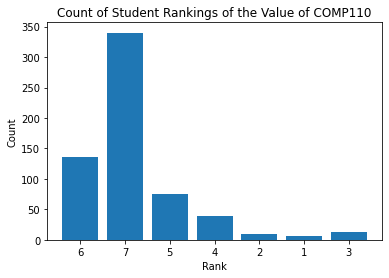

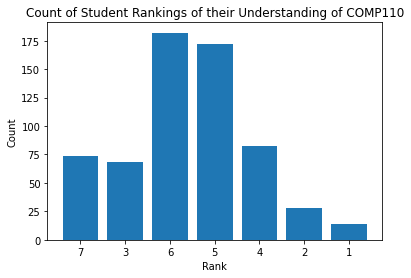

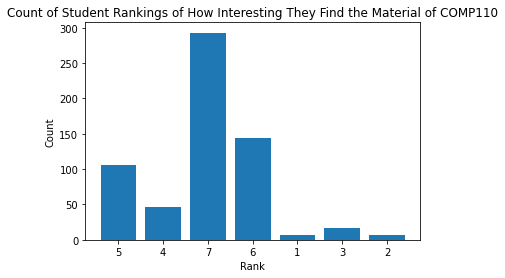

In [153]:
plt.bar(valuable_counts.keys(), valuable_counts.values())
plt.title("Count of Student Rankings of the Value of COMP110")
plt.xlabel("Rank")
plt.ylabel("Count")
plt.show()

plt.bar(understanding_counts.keys(), understanding_counts.values())
plt.title("Count of Student Rankings of their Understanding of COMP110")
plt.xlabel("Rank")
plt.ylabel("Count")
plt.show()

plt.bar(interesting_counts.keys(), interesting_counts.values())
plt.title("Count of Student Rankings of How Interesting They Find the Material of COMP110")
plt.xlabel("Rank")
plt.ylabel("Count")
plt.show()

## Conclusion

In the following markdown cell, write a reflective conclusion given the analysis you performed and identify recommendations.

If your analysis of the data supports your idea, state your recommendation for the change and summarize the data analysys results you found which support it. Additionally, describe any extensions or refinements to this idea which might be explored further. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change.

If your analysis of the data is inconclusive, summarize why your data analysis results were inconclusive in the support of your idea. Additionally, describe what experimental idea implementation or additional data collection might help build more confidence in assessing your idea. Finally, discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by experimenting with your idea.

Finally, if your analysis of the data does not support it, summarize your data analysis results and why it refutes your idea. Discuss the potential costs, trade-offs, or stakeholders who may be negatively impacted by this proposed change. If you disagree with the validity of the findings, describe why your idea still makes sense to implement and what alternative data would better support it. If you agree with the validity of the data analysis, describe what alternate ideas or extensions you would explore instead. 

### Part 5. Conclusion



In this analysis, we want to determine whether portions of COMP110 should be restructured to increase the degree to which students find the material to be valuable.

We considered first, how valuable the students who took the survey find COMP110 material to be and, second, two other factors which might influence value -- understanding of and interest in the material. 

Our analysis resulted in 3 primary outputs:

`Output One: Averages`

Our first result provided the average response value of the students to each valuable, understanding, and interesting. Recall that the responses could be any integer from 1 to 7 with 1 representing Strongly Disagree, 7 Representing Strongly Agree, and 2-6 representing levels of agreement/disagreement in between. 

We found that the approximate average response to:
* valuable was 6.12
* understanding was 4.95
* interesting was 5.97

The average student who responded to the survey moderately to strongly agreed that the survey was valuable, moderately agreed that they were understand the material, and moderately to strongly agreed that the material is intellectually interesting. 

It is important to note that averages do not take into account outliers or other irregularities. When completing a thorough analysis, the distribution of the data should be considered to see what proportion of students respond any of several ways.

`Output Two: Counts`

Our next result provided information on the number of times each of the 7 possible responses was recorded for each valuable, understanding, and interesting. 

These results were output in a dictionary where the key was the response type and the value was the count of times that response was recorded by the survey. 

From this we gathered information about the maximum and minimum responses to each of the three prompts. 

Maximums: student rank, count
* valuable: 7, 340
* understanding: 6, 182
* interesting, 7, 293

Minimums: student rank, count
* valuable: 1, 6 
* understanding: 1, 14
* interesting: 1 and 2, 7

With 620 responses to the survey, over half strongly agreed that the course was valuable and just under 1% strongly disagreeing. For understanding, approximately 29% felt that they understood nearly all of the material and about 2% felt lost. For interesting, about 47% strongly agree that the topics of the course are intellectually interesting and about 1% strongly disagreed. 


`Output Three: Counts Visualized`

While presenting the same data, visualizations are often easier to digest. We created barcharts for each of the three variables where student rank is on the x-axis and counts are on the y-axis. 

* For value and interesting, the data is skewed towards lower rankings. This means that most students answered with 7, many with 5 or 6, very few responded with 1-4. 

* For understanding, the data was more evenly distributed. This means that there was not a large diffrence in the number of responses for each ranking. The most popular responses were 5 and 6, but 7, 4, and 3 still had a moderate number of responses. 2 and 1 saw the lowest number of responses. 

Because value and interesting saw such similar patterns in distribution, maybe these variables are related (i.e. student interest in the topics is related to how they value the skills that they are learning or vice versa) or are influenced by similar variables. More evenly distributed, maybe understanding is independent of a lot of other variables/data collected for this survey. To conclude any of these statements with confidence, further statistical analysis would be necessary, but this analysis generates ideas such as these to consider. 

`Final Conclusion`

From our first output, we found that on average students find the course to be moderate to highly valuable and interesting and moderately easy to understand. From our second output we found that interest and value might be predicted by similar variables or by each other and that understanding is more independent, but that most students found the course to be moderate to highly valuable. 

Because of these findings, we cannot argue that the course needs to be restructured in any way as value of COMP110 topics seems to have been accomplished in the eyes of the students. 

The idea presented at the start of the assignment related to the topics presented, arguing that presenting real-world examples might increase value. If the idea were tested, there is the chance that less students find the topics interesting if the examples do not pertain to the majority, which may decrease value if the variables interesting and valuable are indeed related. Because the average and the majority of students find the course topics and teachings to be valuable and interesting, it is likely a lower risk to keep the topics as they are. 

It would be interesting to compare the results of a class survey which includes this idea to the current survey to see if there is a significant difference in value, but that analysis is beyond the scope of this assignment.